# Final Project Submission
 - Student name: Morgan Jones
 - Student pace: Full Time
 - Scheduled project review date/time:
 - Instructor name: Abhineet Kulkarni
 - Blog post URL: 

# Introduction 
***


## Business Case

##### **Disclaimer**

This work is meant to fulfill educational purposes. The hypothetical business case, and results of modeling are not meant to be considered as medical advise, and has not been approved by any professional or medical body.
***

As of May 4, 2020 COVID-19 has had devastating impacts on the world. To date, there are over 3.5 million confirmed cases in roughly a 5 month window of time. While there are several factors that have led to these disheartening statistics, one key element in this proliferation is travel. Due to the often asymptomatic nature of COVID-19 infections, infected individuals have been able to unknowingly spread the virus to over 200 countries and territories. 
In order to 'flatten the curve' my group would like to **propose a systematic approach to implementing non-invasive testing at key international airports that would identify and quarantine would be infected travelers**. Our proposal is simple, through effective risk mapping and assessment driven by data, high risk travelers' lungs are scanned with computed tomography (CT), and the resulting **x-ray images are assessed with a Convolutional Neural Network trained on detecting COVID-19**. Those travelers identified by the neural network as infected would then be further tested by medical professionals before being approved for travel. **This project focuses on the creation and optimization of this COVID-19 detecting CNN**.

## Objectives

There are two main objectives for this portion of the aforementioned proposal, which are as follows:
 1. Generate a Convolutional Neural Network (CNN) which detects the presence of COVID-19 in CT images with a **high** accuracy.
 2. Reveal indicators of COVID-19 through analysis of said CNN.

## Evaluation Metrics

Our task is essentially a binary classification problem, where an x-ray image is considered input, and **our model produces an prediction of whether this image is of a COVID-19 infected lung, or is not**. With these objectives and framework in mind, the threshold of success mainly rests on the accuracy of our model. We will set the goal of our model attaining **at least an 80% accuracy**. With accuracy here being defined as:

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

Then our model will be successful where:

$$Accuracy >= .80$$


In the case where our model predicts incorrectly, we **prefer a false positive more than a false negative**. In the case of a false positive, a traveler is determined as infected where they are not. In this case that person would be held for further testing, potentially missing their flight. However **in the case of a false negative, our model has determined that an image of lungs that are COVID-19 infected are not, and thus that traveler would continue on potentially infecting others**. Therefore we aim for a model where:


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$

  

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$

Our model will achieve:

$$ \text{Precision}  <  \text{Recall} $$


## Methodology

The process for conducting our research and modeling will follow the iterative **OSEMiN** pipeline. This entails Obtaining, Scrubbing, Exploring, Modeling, and Interpreting the data. This project will use this pipeline in the following manner: 

**OSEMiN Pipeline**:

    Obtain
    - Import the data.

    Scrub
    - Manage datatypes, resolve missing/duplicate values.
    
    Explore
    - Find patterns among the relationships of variables in the dataset.
    
    Model
    - Create predictive models.
    
    iNterpret
    – Identify insights and visualize findings.

Python using keras with a tensorflow backend

Definition for transfer learning: In their famous book, Deep Learning, Goodfellow et al refer to transfer learning in the context of generalization. Their definition is as follows:
Situation where what has been learned in one setting is exploited to improve generalization in another setting.

Inductive Transfer learning: In this scenario, the source and target domains are the same, yet the source and target tasks are different from each other. The algorithms try to utilize the inductive biases of the source domain to help improve the target task. Depending upon whether the source domain contains labeled data or not, this can be further divided into two subcategories, similar to multitask learning and self-taught learning, respectively.

Feature-representation transfer: This approach aims to minimize domain divergence and reduce error rates by identifying good feature representations that can be utilized from the source to target domains. Depending upon the availability of labeled data, supervised or unsupervised methods may be applied for feature-representation-based transfers.

# Obtain
***

At this stage, there is a limited amount of data pertaining to CT scans of COVID-19 cases available openly with respect to the amount effective when conducting deep learning. For this reason we will first build a model on pneumonia data, using x-ray images of lungs affected by pneumonia, and negatives of lungs not affected by pneumonia. After creating this model, we will conduct transfer learning to further train this CNN to assess for COVID-19 with our smaller dataset. In order to begin, we will need to obtain this data, and the libraries needed for this project.

## Import Libraries

We will start with the most popular libraries for importing and manipulating data. These first libraries are as follows:

In [1]:
import pandas as pd  # Alias pandas to be referred to as pd
import numpy as np  # Alias numpy to be referred to as np
import matplotlib.pyplot as plt  # Alias matplotlib.pyplot to be referred to as plt
import matplotlib.ticker as ticker # Alias matplotlib.ticker to be referred to as ticker
import seaborn as sns  # Alias seaborn to be referred to as sns
import os, shutil # Necessary for creating new folders to store image data
import cv2

# Magic funtion to allow plot outputs to appear and be stored within out notebook
%matplotlib inline
# View all of the columns of a returned object
pd.set_option('display.max_columns', None)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, ZeroPadding2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os

In [3]:
import datetime

In [4]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [5]:
from keras.utils import to_categorical #For One-hot Encoding
from keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from keras.callbacks import EarlyStopping
from glob import glob #retriving an array of files in directories

In [6]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [7]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.0.0


In [8]:
from tensorflow.keras.callbacks import TensorBoard
# Load the TensorBoard notebook extension.
%load_ext tensorboard

## Import Pneumonia Data

We will source our pneumonia dataset from "Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning". This data can be found at the url: https://data.mendeley.com/datasets/rscbjbr9sj/3 with License: CC BY 4.0 and Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5. This data has also been featured on Kaggle from the user Paul Mooney at this url: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia . We will download these pneumonia images from kaggle now.

In [9]:
"""
pne_train_dir = 'chest_xray/chest_xray/train/PNEUMONIA'
norm_train_dir = 'chest_xray/chest_xray/train/NORMAL'

pne_test_dir = 'chest_xray/chest_xray/test/PNEUMONIA'
norm_test_dir = 'chest_xray/chest_xray/test/NORMAL'

pne_val_dir = 'chest_xray/chest_xray/val/PNEUMONIA'
norm_val_dir = 'chest_xray/chest_xray/val/NORMAL'
"""

"\npne_train_dir = 'chest_xray/chest_xray/train/PNEUMONIA'\nnorm_train_dir = 'chest_xray/chest_xray/train/NORMAL'\n\npne_test_dir = 'chest_xray/chest_xray/test/PNEUMONIA'\nnorm_test_dir = 'chest_xray/chest_xray/test/NORMAL'\n\npne_val_dir = 'chest_xray/chest_xray/val/PNEUMONIA'\nnorm_val_dir = 'chest_xray/chest_xray/val/NORMAL'\n"

In [10]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [11]:
train = get_training_data('pneumonia_dataset/chest_xray/train')
test = get_training_data('pneumonia_dataset/chest_xray/test')
val = get_training_data('pneumonia_dataset/chest_xray/val')

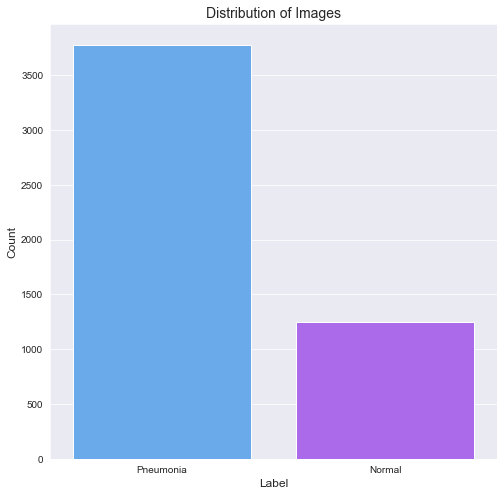

In [31]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_style('darkgrid')
ax = sns.countplot(l, palette='cool')   
ax.set_title('Distribution of Images', fontsize=14)
ax.set_xlabel('Label', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

Text(0.5, 1.0, 'NORMAL')

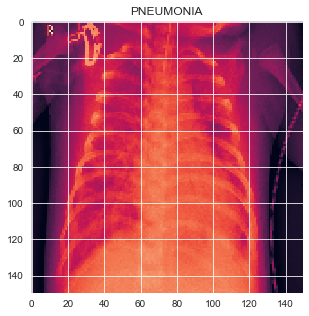

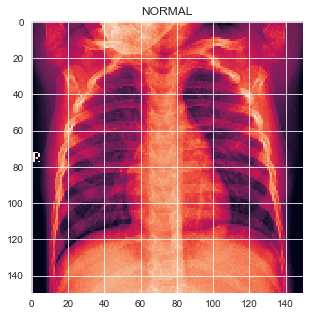

In [13]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

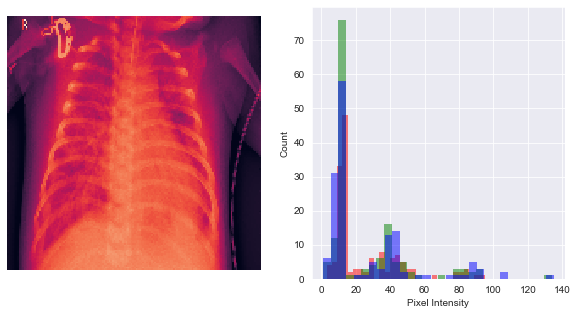

In [36]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(train[0][0])

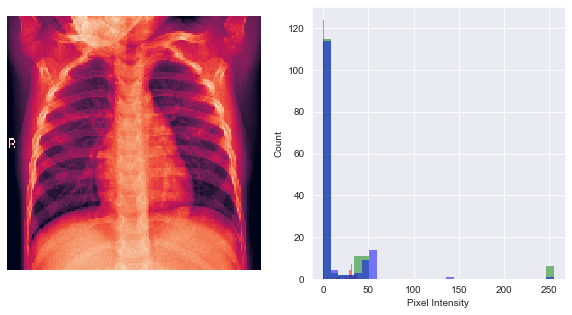

In [37]:
plotHistogram(train[-1][0])

In [14]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [15]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [16]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [17]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [41]:
cust_model = Sequential()
cust_model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
cust_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
cust_model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
cust_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
cust_model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
cust_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
cust_model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
cust_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
cust_model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
cust_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
cust_model.add(Flatten())
cust_model.add(Dense(units = 128 , activation = 'relu'))
cust_model.add(Dropout(0.2))
cust_model.add(Dense(units = 1 , activation = 'sigmoid'))
cust_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
cust_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 19, 19, 128)      

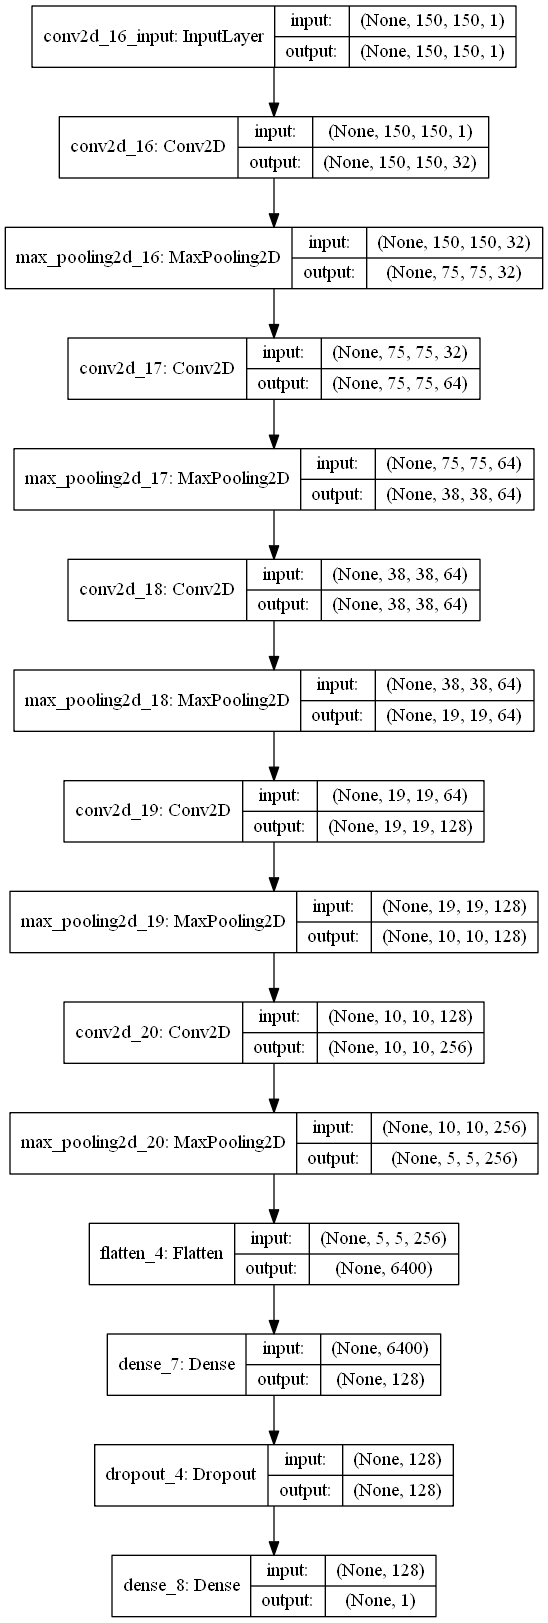

In [42]:
plot_model(cust_model, to_file='cust_model_architecture.png', show_shapes=True, show_layer_names=True)

In [20]:
import time
from tensorflow.python.keras.callbacks import TensorBoard
import datetime
datetime = datetime.datetime.now()  # waves goodbye to datetime module!

logdir = os.path.join("logs", datetime.strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = cust_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                         epochs=10, validation_data=datagen.flow(x_val, y_val))

Epoch 1/10
157/157 [==============================] - 14s 90ms/step - loss: 0.4835 - accuracy: 0.7714 - val_loss: 0.7979 - val_accuracy: 0.5905
Epoch 2/10
157/157 [==============================] - 13s 84ms/step - loss: 0.3293 - accuracy: 0.8463 - val_loss: 0.5797 - val_accuracy: 0.8524
Epoch 3/10
157/157 [==============================] - 13s 83ms/step - loss: 0.2520 - accuracy: 0.8881 - val_loss: 0.3730 - val_accuracy: 0.8333
Epoch 4/10
157/157 [==============================] - 12s 76ms/step - loss: 0.2202 - accuracy: 0.9052 - val_loss: 0.6907 - val_accuracy: 0.8524
Epoch 5/10
157/157 [==============================] - 12s 75ms/step - loss: 0.2007 - accuracy: 0.9164 - val_loss: 0.5359 - val_accuracy: 0.9000
Epoch 6/10
157/157 [==============================] - 12s 78ms/step - loss: 0.1750 - accuracy: 0.9303 - val_loss: 0.2126 - val_accuracy: 0.8524
Epoch 7/10
157/157 [==============================] - 12s 74ms/step - loss: 0.1713 - accuracy: 0.9305 - val_loss: 0.4459 - val_accuracy:

In [21]:
print("Loss of the model is - " , cust_model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , cust_model.evaluate(x_test,y_test)[1]*100 , "%")

624/624 [==============================] - 1s 932us/step
Loss of the model is -  59.37702102312006 %
624/624 [==============================] - 0s 638us/step
Accuracy of the model is -  85.73718070983887 %


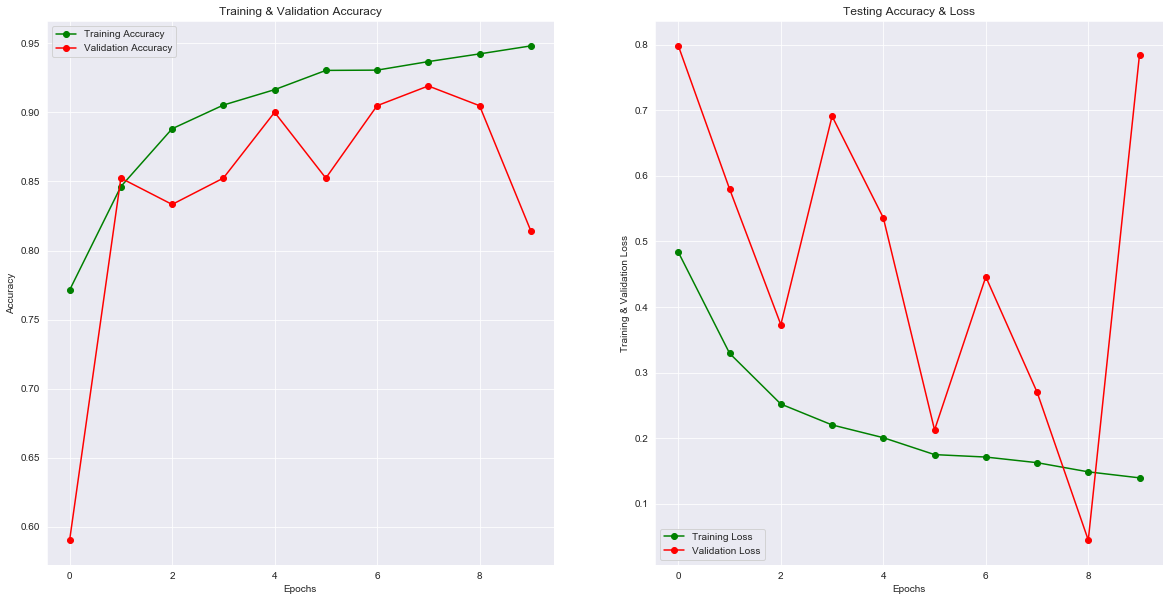

In [22]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [23]:
predictions = cust_model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.82      0.99      0.90       390
   Normal (Class 1)       0.99      0.63      0.77       234

           accuracy                           0.86       624
          macro avg       0.90      0.81      0.83       624
       weighted avg       0.88      0.86      0.85       624



In [25]:
cm = confusion_matrix(y_test,predictions)
cm

array([[388,   2],
       [ 87, 147]], dtype=int64)

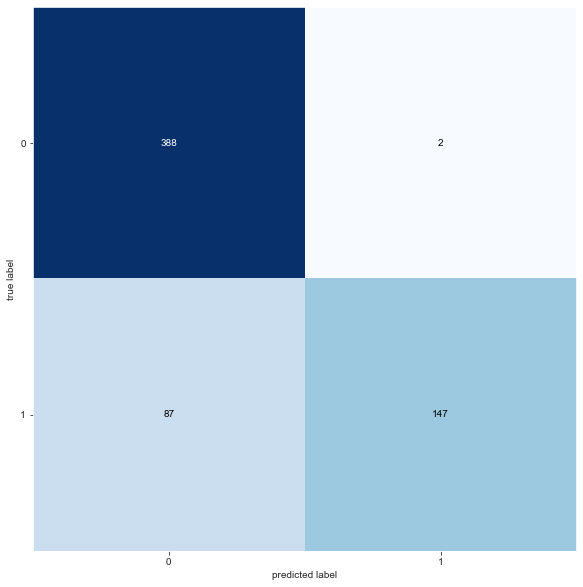

In [26]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(10, 10))
plt.show()

In [43]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
cm

,0,1
0,388,2
1,87,147


In [44]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

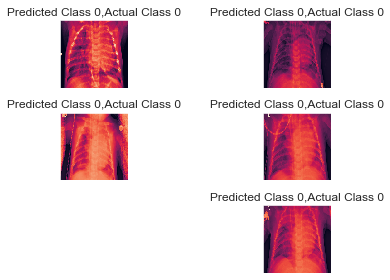

In [45]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

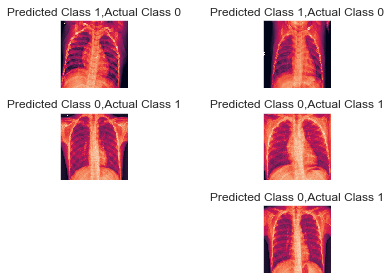

In [46]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [ ]:
# cust_model.save('cust_cnn.h5')

In [47]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 20240), started 1:47:46 ago. (Use '!kill 20240' to kill it.)

In [ ]:
labels = ['COVID', 'NORMAL']
img_size = 150

train = get_training_data('covid19_dataset/train')
test = get_training_data('covid19_dataset/test')
val = get_training_data('covid19_dataset/val')

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Covid-19")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l, palette='cool')  

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
datagen.fit(x_train)

In [ ]:

y_train = to_categorical(y_train)
y_val = to_categorical(y_val) 

In [ ]:
input_shape = (150, 150, 1)

cov_model = Sequential()
cov_model.add(cust_model)
cov_model.add(Dense(512, activation='relu', input_dim=input_shape))
cov_model.add(Dropout(0.3))
cov_model.add(Dense(512, activation='relu'))
cov_model.add(Dropout(0.3))
cov_model.add(Dense(2, activation='sigmoid'))

for layer in cov_model.layers:
    layer.trainable = False
    
cov_model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'],)

reduce_lr = tf.compat.v1.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=1e-6)

cov_model.summary()

In [ ]:
history = cov_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=30, validation_data=datagen.flow(x_val, y_val), callbacks=[reduce_lr])

In [ ]:
def get_labeled_files(folder):
    x = []
    y = []
    
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['NORMAL']:
                label = 0
            elif folderName in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                continue # we do not investigate other dirs
            for image_filename in os.listdir(folder + folderName):
                img_path = folder + folderName + '/' + image_filename
                if img_path is not None and str.endswith(img_path, 'jpeg'):
                    x.append(img_path)
                    y.append(label)
    
    x = np.asarray(x)
    y = np.asarray(y)
    return x, y

In [ ]:
x, y = get_labeled_files('../input/pneumonia_dataset/chest_xray/train')

list(zip(x, y))[:10]

In [ ]:
NUM_CLASSES = 2

def input_parser(img_path, label):
    # convert the label to one-hot encoding
    one_hot = tf.one_hot(label, NUM_CLASSES)
    # read the img from file and decode it using tf
    img_file = tf.read_file(img_path)
    img_decoded = tf.image.decode_jpeg(img_file, channels=3, name="decoded_images")
    return img_decoded, one_hot

# This function takes image and resizes it to smaller format (150x150)
def image_resize(images, labels):
    # Be very careful with resizing images like this and make sure to read the doc!
    # Otherwise, bad things can happen - https://hackernoon.com/how-tensorflows-tf-image-resize-stole-60-days-of-my-life-aba5eb093f35
    resized_image = tf.image.resize_images(images, (150, 150), align_corners=True)
    resized_image_asint = tf.cast(resized_image, tf.int32)
    return resized_image_asint, labels    

In [ ]:
# Execution plan is defined here.
# Since it uses lazy evaluation, the images will not be read after calling build_pipeline_plan()
# We need to use iterator defined here in tf context
def build_pipeline_plan(img_paths, labels, batch_size):

    # We build a tensor of image paths and labels
    tr_data = tf.data.Dataset.from_tensor_slices((img_paths, labels))
    # First step of input pipeline - read images in paths as jpegs
    tr_data_imgs = tr_data.map(input_parser)
    # Apply resize to each image in the pipeline
    tr_data_imgs = tr_data_imgs.map(image_resize)
    # Gives us opportuinty to batch images into small groups
    tr_dataset = tr_data_imgs.batch(batch_size)
    # create TensorFlow Iterator object directly from input pipeline
    iterator = tr_dataset.make_one_shot_iterator()
    next_element = iterator.get_next()
    return next_element

# Function to execute defined pipeline in Tensorflow session
def process_pipeline(next_element):
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
    with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
        # get each element of the training dataset until the end is reached
        # in our case only one iteration since we read everything as 1 batch
        # can be multiple iterations if we decrease BATCH_SIZE to eg. 10
        images = []
        labels_hot = []
        while True:
            try:
                elem = sess.run(next_element)
                images = elem[0]
                labels_hot = elem[1]
            except tf.errors.OutOfRangeError:
                print("Finished reading the dataset")
                return images, labels_hot

In [ ]:
def load_dataset(path, batch_size):
    tf.reset_default_graph()
    files, labels = get_labeled_files(path)
    p = tf.constant(files, name="train_imgs")
    l = tf.constant(labels, name="train_labels")
    
    next_element = build_pipeline_plan(p, l, batch_size=batch_size)
    imgs, labels = process_pipeline(next_element)
    return imgs, labels

In [ ]:
x_train, y_train = load_dataset('pneumonia_dataset/chest_xray/train', 6000)
x_test, y_test = load_dataset("pneumonia_dataset/chest_xray/test", 6000)
x_val, y_val = load_dataset("pneumonia_dataset/chest_xray/val", 6000)

In [ ]:
classes = ["NORMAL", "PNEUMONIA"]
data_gen = ImageDataGenerator() #Augmentation happens here

train_batches = data_gen.flow_from_directory('pneumonia_dataset/chest_xray/train', target_size = (226, 226), classes = classes, class_mode = "categorical")
val_batches = data_gen.flow_from_directory('pneumonia_dataset/chest_xray/val', target_size = (226, 226), classes = classes, class_mode = "categorical")
test_batches = data_gen.flow_from_directory('pneumonia_dataset/chest_xray/test', target_size = (226, 226), classes = classes, class_mode = "categorical")

In [ ]:
#This is a Convolutional Artificial Neural Network
#VGG16 Model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Viewing the summary of the model
model.summary()

In [ ]:
optimizer = Adam(lr = 0.001)
early_stopping_monitor = EarlyStopping(patience = 3, monitor = "val_acc", mode="max", verbose = 2)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
history = model.fit_generator(epochs=10, callbacks=[early_stopping_monitor], shuffle=True, validation_data=val_batches, generator=train_batches, steps_per_epoch=500, validation_steps=10,verbose=2)
prediction = model.predict_generator(generator=train_batches, verbose=2, steps=100)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

input_shape=(150, 150, 1)

covModel = Sequential()
cov_model.add(cust_model)
cov_model.add(Dense(512, activation='relu', input_dim=input_shape))
cov_model.add(Dropout(0.3))
cov_model.add(Dense(512, activation='relu'))
cov_model.add(Dropout(0.3))
cov_model.add(Dense(1, activation='sigmoid'))
"""
cust_model(weights=cust_model.weights, include_top=False,
    input_tensor=Input(shape=(150, 150, 1)),inputs=cust_model.input)

outputs = covModel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=covModel.input, outputs=outputs)
"""
for layer in range(4):
    cov_model.layers.trainable = False

cov_model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
data_santa_dir = 'data/santa/'
data_not_santa_dir = 'data/not_santa/'
new_dir = 'split/'


In [ ]:
covid_path = 'dataset/covid_dataset.csv'
covid_image_path = 'dataset/covid_adjusted/'

normal_path = 'dataset/normal_xray_dataset.csv'
normal_image_path = 'dataset/normal_dataset/'

covid_df = pd.read_csv(covid_path, usecols=['filename', 'finding'])
normal_df = pd.read_csv(normal_path, usecols=['filename', 'finding'])

display(normal_df.head())

covid_df.head()

In [ ]:
covid_images = []
covid_labels = []

for index, row in covid_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = covid_image_path + filename

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    covid_images.append(image)
    covid_labels.append(label)

normal_images = []
normal_labels = []

for index, row in normal_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = normal_image_path + filename

    # temporary fix while we preprocess ALL the images
    if filename == '4c268764-b5e5-4417-85a3-da52916984d8.jpg':
        break

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    normal_images.append(image)
    normal_labels.append(label)

# normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255

# normalize to interval of [0,1]
normal_images = np.array(normal_images) / 255

In [ ]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

plot_images(covid_images, 'Positive COVID-19 Cases')
plot_images(normal_images, 'Negative COVID-19 Cases')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# split into training and testing
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)

normal_x_train, normal_x_test, normal_y_train, normal_y_test = train_test_split(
    normal_images, normal_labels, test_size=0.2)

X_train = np.concatenate((normal_x_train, covid_x_train), axis=0)
X_test = np.concatenate((normal_x_test, covid_x_test), axis=0)
y_train = np.concatenate((normal_y_train, covid_y_train), axis=0)
y_test = np.concatenate((normal_y_test, covid_y_test), axis=0)

# make labels into categories - either 0 or 1
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

In [ ]:
X_train_contrast = []

for x in X_train:
    contrast = tf.image.adjust_contrast( x, 2 )
    X_train_contrast.append(contrast.numpy())

plot_images(X_train_contrast, 'Adjusted Contrast')

In [ ]:
X_train_saturation = []

for x in X_train:
    saturation = tf.image.adjust_saturation( x, 3 )
    X_train_saturation.append(saturation.numpy())

plot_images(X_train_saturation, 'Adjusted Saturation')

In [ ]:
X_train_flipped = []

for x in X_train:
    flipped = tf.image.flip_left_right(x)
    X_train_flipped.append(flipped.numpy())

plot_images(X_train_flipped, 'Flipped Left Right')

In [ ]:
X_train_flipped_up_down = []

for x in X_train:
    flipped = tf.image.flip_up_down(x)
    X_train_flipped_up_down.append(flipped.numpy())

plot_images(X_train_flipped_up_down, 'Flipped Up Down')

In [ ]:
X_train_flipped_up_down_left_right = []

for x in X_train_flipped_up_down:
    flipped = tf.image.flip_left_right(x)
    X_train_flipped_up_down_left_right.append(flipped.numpy())

plot_images(X_train_flipped_up_down_left_right, 'Flipped Up Down Left Right')

In [ ]:
# input_shape=(150, 150, 1)

cov_model = Sequential()
cov_model.add(cust_model)
cov_model.add(Dense(512, activation='relu', input_dim=input_shape))
cov_model.add(Dropout(0.3))
cov_model.add(Dense(512, activation='relu'))
cov_model.add(Dropout(0.3))
cov_model.add(Dense(1, activation='sigmoid'))

for layer in cov_model.layers:
    layer.trainable = False

cov_model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

history = cov_model.fit(train_aug.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=10)

In [ ]:
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

cov_model = cust_model(weights=model.weights, include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = cov_model.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=cov_Model.input, outputs=outputs)

for layer in cov_model.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
"""

In [ ]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=10)

In [ ]:
y_pred = model.predict(X_test, batch_size=32)
y_pred_covid = model.predict(covid_x_test, batch_size=32)

In [ ]:
y_test_covid = LabelBinarizer().fit_transform(covid_y_test)
y_test_covid = to_categorical(y_test_covid)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

In [ ]:
#Data preprocessing and analysis
classes = ["NORMAL", "PNEUMONIA"]
train_data = glob(train+"/NORMAL/*.jpeg")
train_data += glob(train+"/PNEUMONIA/*.jpeg")
data_gen = ImageDataGenerator() #Augmentation happens here
#But in this example we're not going to give the ImageDataGenerator method any parameters to augment our data.

In [ ]:
imgs_pne_train = [file for file in os.listdir(pne_train_dir) if file.endswith('.jpeg')]

In [ ]:
type(imgs_pne_train)

In [ ]:
imgs_pne_train[0:5]

In [ ]:
print('There are', len(imgs_pne_train), 'Pneumonia training images')

In [ ]:
imgs_norm_train = [file for file in os.listdir(norm_train_dir) if file.endswith('.jpeg')]

In [ ]:
print('There are', len(imgs_norm_train), 'Normal training images')

In [ ]:
imgs_pne_test = [file for file in os.listdir(
    pne_test_dir) if file.endswith('.jpeg')]
imgs_norm_test = [file for file in os.listdir(
    norm_test_dir) if file.endswith('.jpeg')]

imgs_pne_val = [file for file in os.listdir(
    pne_val_dir) if file.endswith('.jpeg')]
imgs_norm_val = [file for file in os.listdir(
    norm_val_dir) if file.endswith('.jpeg')]

print('There are', len(imgs_pne_train), 'Pneumonia training images')
print('There are', len(imgs_norm_train), 'Normal training images')
print('\n')
print('There are', len(imgs_pne_test), 'Pneumonia testing images')
print('There are', len(imgs_norm_test), 'Normal testing images')
print('\n')
print('There are', len(imgs_pne_val), 'Pneumonia validation images')
print('There are', len(imgs_norm_val), 'Normal validation images')
print('\n')
print('There are', len(imgs_pne_train)+len(imgs_norm_train)+len(imgs_pne_test) +
      len(imgs_norm_test)+len(imgs_pne_val)+len(imgs_norm_val), 'images in total.')

Let's take a look at our first image in the pneumonia training set:

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
from keras.preprocessing.image import image, array_to_img, img_to_array, load_img, ImageDataGenerator
from keras import optimizers
np.random.seed(123)

In [ ]:
img_path = 'chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
# get all the data in the directory test (624 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'chest_xray/chest_xray/test', 
        target_size=(224, 224), batch_size = 624) 

# get all the data in the directory validation (210 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'chest_xray/chest_xray/val', 
        target_size=(224, 224), batch_size = 210)

# get all the data in the directory split/train (5022 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'chest_xray/chest_xray/train', 
        target_size=(224, 224), batch_size=5022)

In [ ]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [ ]:
# plot images with labels
def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
plt.imshow(train_images[0])

In [ ]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

plot_images(train_images, 'Training Sample')
plot_images(test_images, 'Testing Sample')

In [ ]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

In [ ]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

In [ ]:
train_y = np.reshape(train_labels[:,0], (5022,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (210,1))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, Conv2D

Artificial Neural Network

In [ ]:
# Build a baseline fully connected model
from keras import models
from keras import layers

np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(150528,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

In [ ]:
results_train = model.evaluate(train_img, train_y) 

In [ ]:
results_test = model.evaluate(test_img, test_y)

In [ ]:
results_train

In [ ]:
results_test

Baseline CNN:

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

In [ ]:
results_train = model.evaluate(train_images, train_y)

In [ ]:
results_test = model.evaluate(test_images, test_y)

In [ ]:
results_train

In [ ]:
results_test

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

CNN with Regularization

In [ ]:
input_shape = (224, 224, 3)

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

In [ ]:
results_train = model.evaluate(train_images, train_y)

In [ ]:
results_test = model.evaluate(test_images, test_y)

In [ ]:
results_train

In [ ]:
results_test

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic_2 CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
# model.save('basic_cnn.h5')

CNN with Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
'''
aug_img = 4997
pne_generator = train_datagen.flow(train_images[aug_img:aug_img+1], train_labels[aug_img:aug_img+1],
                                   batch_size=1)
pne = [next(train_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in pne])
l = [ax[i].imshow(pne[i][0][0]) for i in range(0,5)]
'''

In [ ]:
train_generator = train_datagen.flow(train_images, train_labels, batch_size=30)
val_generator = val_datagen.flow(val_images, val_labels, batch_size=20)
input_shape = (224, 224, 3)


model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)  

In [ ]:
model.save('cnn_img_aug.h5')

VGG16

In [ ]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

In [ ]:
bottleneck_feature_example = vgg.predict(train_images[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [ ]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_images)
validation_features_vgg = get_bottleneck_features(vgg_model, val_images)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]
epochs = 30
batch_size = 32

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(x=train_features_vgg, y=train_y,
                    validation_data=(validation_features_vgg, val_y),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG16 Transfer CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
results_train = model.evaluate(train_features_vgg, train_y)

In [ ]:
results_test = model.evaluate(test_images, test_y)

In [ ]:
results_train

In [ ]:
results_test

In [ ]:
model.save('vgg_16_1.h5')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_images, train_y, batch_size=30)
val_generator = val_datagen.flow(val_images, val_y, batch_size=20)

In [ ]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)    

VGG19

by the Visual Geometry Group at the University of Oxford, which specializes in building very deep convolutional networks for large-scale visual recognition.

variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer). There are other variants of VGG like VGG11, VGG16 and others. VGG19 has 19.6 billion FLOPs

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
vgg19 = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(224, 224, 3))

In [ ]:
# Define Model Architecture
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

cnn_base.trainable = False

In [ ]:
# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(model.trainable_weights))

model.summary()

In [ ]:
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10

"""
# get all the data in the directory test (624 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'chest_xray/chest_xray/test', 
        target_size=(224, 224), batch_size = 624) 

# get all the data in the directory validation (210 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'chest_xray/chest_xray/val', 
        target_size=(224, 224), batch_size = 210)

# get all the data in the directory split/train (5022 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'chest_xray/chest_xray/train', 
        target_size=(224, 224), batch_size=5022)
"""

# Get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

"""

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(240, 240), 
                                                    batch_size= 20,
                                                    class_mode='categorical') 

# Get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_dir, 
                                                                       target_size=(240, 240), 
                                                                       batch_size=20,
                                                                       class_mode='categorical')

# Get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, 
                                                                        target_size=(240, 240), 
                                                                        batch_size=180,
                                                                        class_mode='categorical',
                                                                        shuffle=False)
"""

# Compilation
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

# Fitting the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=8,
                              epochs=30,
                              validation_data=val_generator,
                              validation_steps=10)


end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

In [ ]:
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

In [ ]:
vgg19_model = VGG19()

In [ ]:
vgg19_model.summary()

In [ ]:
vgg19_model.layers.pop()

In [ ]:
# Transform VGG19 into a sequential model
model = Sequential()
for layer in vgg19_model.layers:
    model.add(layer)

I believe that this is an issue with how Model was rewritten to be more graph-based. In addition to the layers property models also have an outputs property, so when you pop layers off your last layer is left dangling in the model's output (which is why your model still thinks its output size is 1000).

A method to pop layers off and manage all the links correctly is needed, but until then I believe this would work: (my model compiles, but I haven't tried training it yet)

In [ ]:
model.summary()

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(Dense(1, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.fit_generator(train_images,
                    steps_per_epoch=4,
                    validation_data=(val_images, val_y),
                    validation_steps=4,
                    epochs=30,
                    verbose=2
                    )
"""
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))
"""

COVID-19

In [ ]:
# Update dataset: !git pull
!git clone https://github.com/casperbh96/COVID-19-Detection.git dataset

## Data Description

# Scrub
***

# Explore
***

Tracking covid with Weather API: https://developer.ibm.com/tutorials/chart-covid-19-progression-with-the-weather-company-disease-tracker-api/

# Model
***

**Pneumonia model**: https://www.kaggle.com/kosovanolexandr/keras-nn-x-ray-predict-pneumonia-86-54/data

**Keras documentation on pre-trained NN's**: https://keras.io/applications/

Covid Dataset (58): https://github.com/ieee8023/covid-chestxray-dataset

**Covid model with augmentation and transfer learning**: - https://github.com/casperbh96/COVID-19-Detection/blob/master/Deep_Learning_for_COVID_19.ipynb

**View model with google experiments**:  - https://experiments.withgoogle.com/visualizing-high-dimensional-space
                                     - http://projector.tensorflow.org/

**View model through Tensorboard**: - https://www.tensorflow.org/tensorboard/graphs
                                - https://adventuresinmachinelearning.com/introduction-to-tensorboard-and-tensorflow-visualization/
                                - https://www.datacamp.com/community/tutorials/tensorboard-tutorial

**Visualizing through activation layers**: Notes Module 4 Appendix

**Visualizing with Lucid**:  - https://github.com/MoJoMoon/lucid
                         - https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb

**Visualizing with Activation Atlas**: https://github.com/tensorflow/lucid/blob/master/notebooks/activation-atlas/class-activation-atlas.ipynb

# iNterpret
***

# Conclusion
***